In [ ]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

conn = psycopg2.connect(
    host="localhost",
    database="superstore",
    user="postgres",
    password="1202"
)

query = "SELECT * FROM superstore;"
df = pd.read_sql(query, conn)


C:\Users\iamma\AppData\Local\Temp\ipykernel_27396\299444812.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


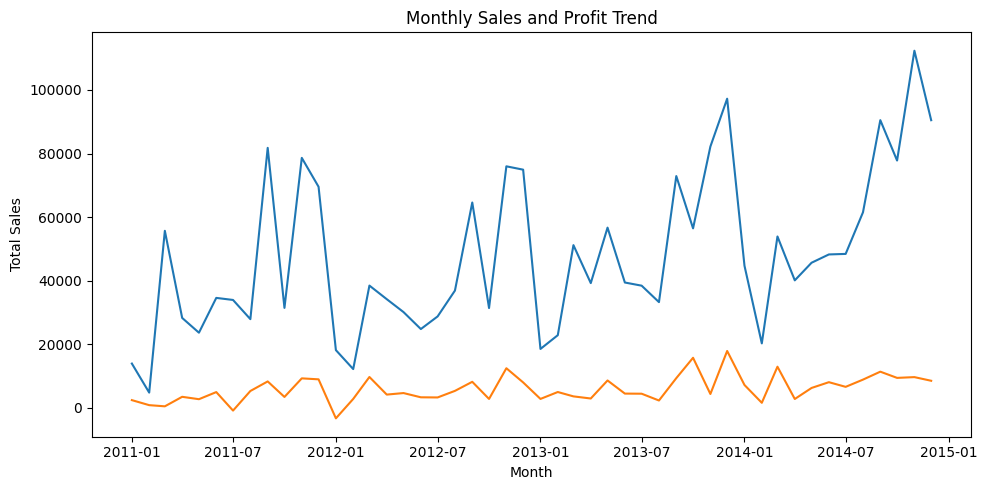

In [ ]:

df['Order Date'] = pd.to_datetime(df['Order Date'])

monthly_sales = (
    df.groupby(df['Order Date'].dt.to_period('M'))['Sales']
    .sum()
)

monthly_pr = (
    df.groupby(df['Order Date'].dt.to_period('M'))['Profit']
    .sum()
)


monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_pr.index = monthly_pr.index.to_timestamp()


plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, label="Sales")
plt.plot(monthly_pr.index, monthly_pr.values, label="Profit")
plt.title("Monthly Sales and Profit Trend")
plt.legend()
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


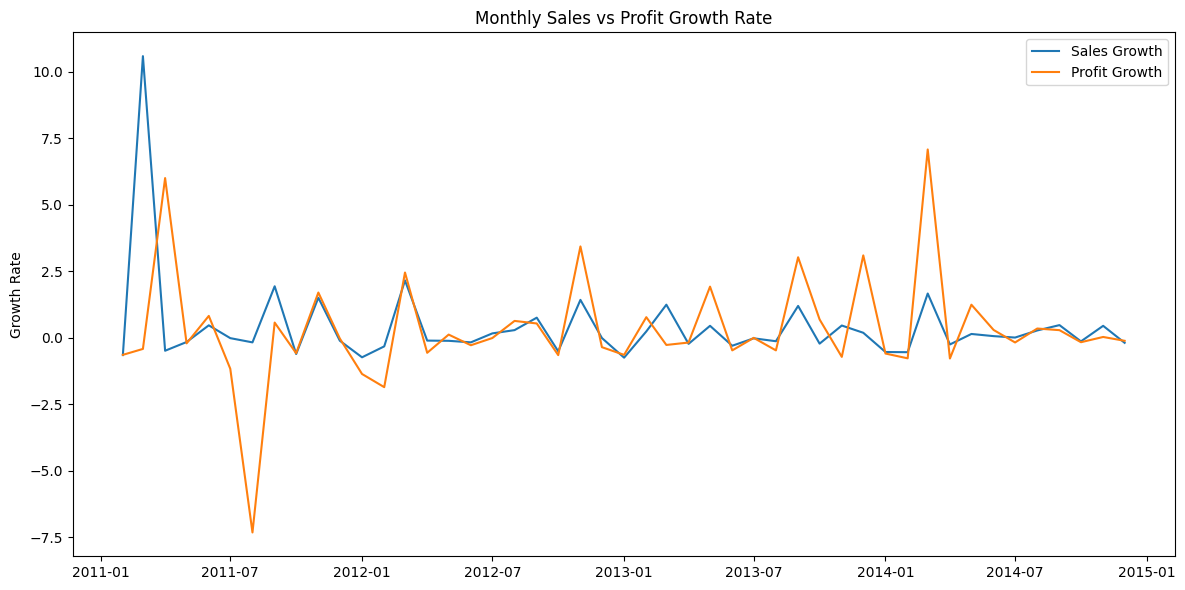

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

monthly = (
    df.groupby(df['Order Date'].dt.to_period('M'))[['Sales', 'Profit']]
    .sum()
)

monthly.index = monthly.index.to_timestamp()

sales_growth = monthly['Sales'].pct_change()
profit_growth = monthly['Profit'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(sales_growth, label='Sales Growth')
plt.plot(profit_growth, label='Profit Growth')
plt.title("Monthly Sales vs Profit Growth Rate")
plt.ylabel("Growth Rate")
plt.legend()
plt.tight_layout()
plt.show()



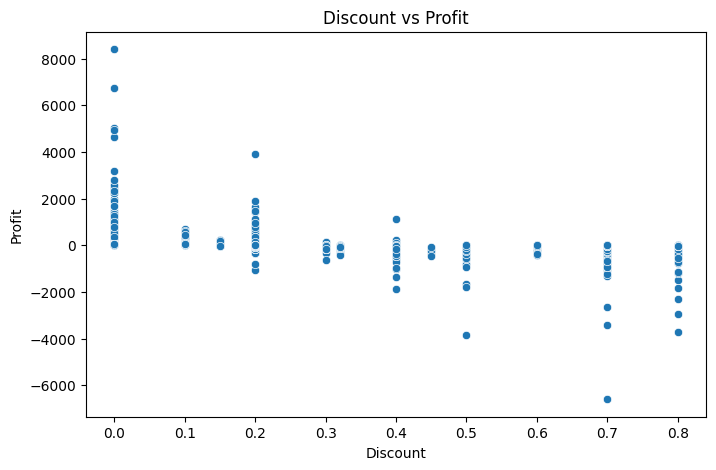

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()


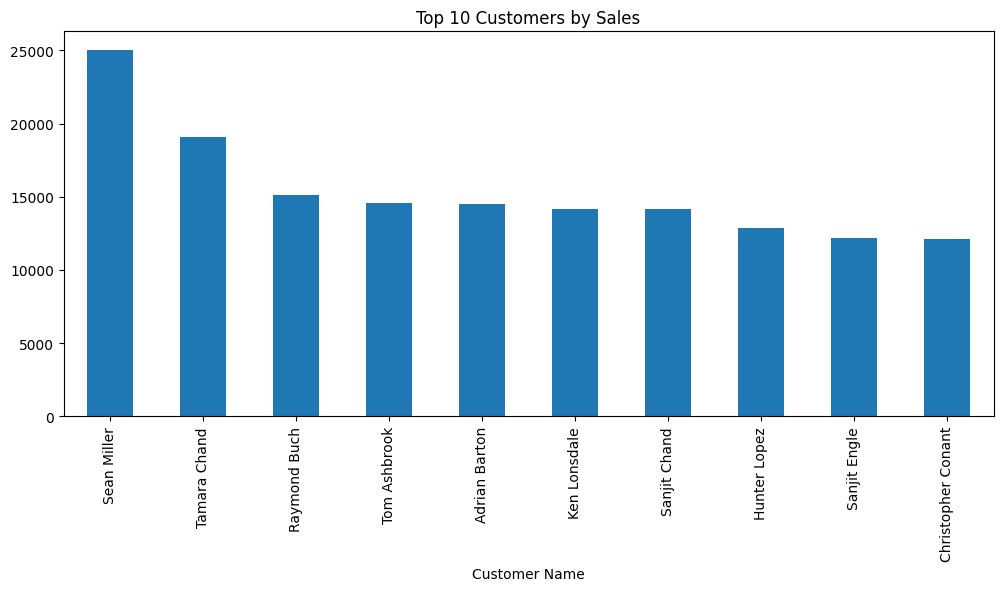

In [28]:
top_customers = (
    df.groupby('Customer Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,5))
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Sales")
plt.show()
